<a href="https://colab.research.google.com/github/sivsri/jovian/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Course Project on [Data Analysis with Python: Zero to Pandas](https://www.zerotopandas.com)

Performing complete Exploratory Data Analysis on Dataset - [GDP (in USD) Per Capita Income by Country](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country), using Python libraries pandas and plotly.

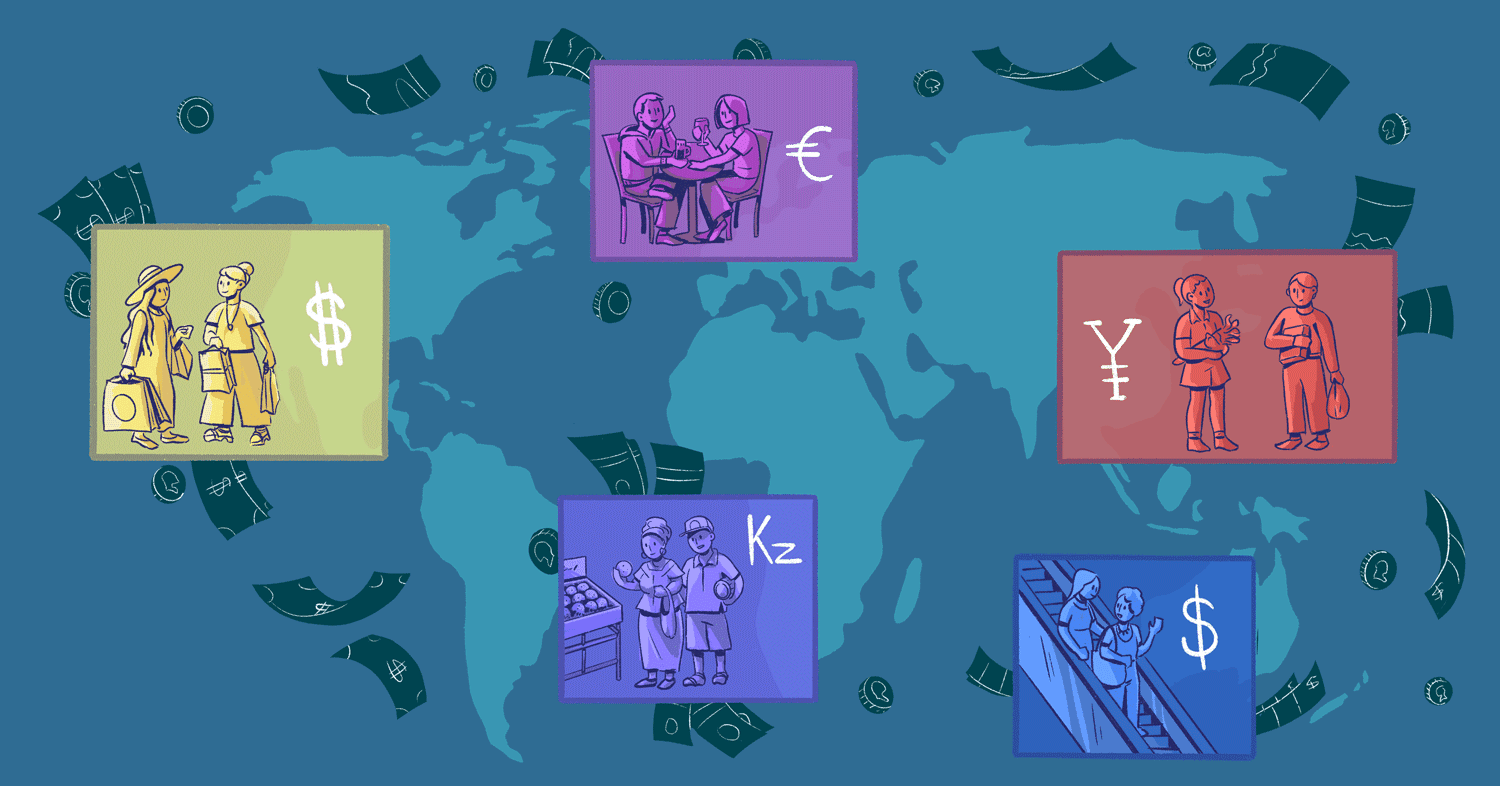

# **GDP (in USD) Per Capita Income by Country - Exploratory Data Analysis**

Gross domestic product (GDP) is the most commonly used measure for the size of an economy.

GDP can be compiled for a country or a region.

The GDP is the total of all value added created in an economy.

The value added means, the value of the goods and services that have been produced (Output) minus the value of the goods and services needed to produce them (Intermediate consumption).

Gross value added = gross value of output – value of intermediate consumption.

The sum of the gross value added in the various economic activities is known as "GDP at factor cost" (Production approach).

In [3]:
# Importing `pandas`

import pandas as pd
import numpy as np

In [4]:
# Loading the Dataset

df = pd.read_csv('/content/List of Countries by GDP (nominal) per Capita.csv')

**Data Preparation and Cleaning**

Structuring and Wrangling data

In [5]:
# View first 10 records of the data

df.head(10)

,Unnamed: 0,Country/Territory,UN Region,IMF,Unnamed: 4,World Bank,Unnamed: 6,United Nations,Unnamed: 8
0,NaN,NaN,NaN,Estimate,Year,Estimate,Year,Estimate,Year
1,1.0,Monaco,Europe,0,0,234316,2021,234317,2021
2,2.0,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,3.0,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,4.0,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,5.0,Bermuda,Americas,0,0,114090,2021,112653,2021
6,6.0,Norway,Europe,101103,2023,89154,2021,89242,2021
7,7.0,Switzerland,Europe,98767,2023,91992,2021,93525,2021
8,8.0,Singapore,Asia,91100,2023,72794,2021,66822,2021
9,9.0,Isle of Man,Europe,0,0,87158,2019,0,0


In [6]:
# Renaming the unnamed columns, droping the first row and the first column

df = df.rename(columns={'Unnamed: 4':'IMF Year', 'Unnamed: 6':'WB Year', 'Unnamed: 8':'UN Year'})
df = df.drop(columns='Unnamed: 0')
df = df.drop(0)

df.head()

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [7]:
# Checking the shape(no. of rows and columns) of the data

df.shape

(223, 8)

In [8]:
# To discover the column names, its count and dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country/Territory  223 non-null    object
 1   UN Region          223 non-null    object
 2   IMF                223 non-null    object
 3   IMF Year           223 non-null    object
 4   World Bank         223 non-null    object
 5   WB Year            223 non-null    object
 6   United Nations     223 non-null    object
 7   UN Year            223 non-null    object
dtypes: object(8)
memory usage: 14.1+ KB


There is invalid data in the UN Year column (got to know while changing its dtype from object to int, an error occurred)

In [9]:
# Checking the values of this column

df['UN Year'].value_counts()

2021          213
0               9
[n 10]2021      1
Name: UN Year, dtype: int64

In [10]:
# Getting the index of it

df.index[df['UN Year'] == '[n 10]2021']

Int64Index([194], dtype='int64')

In [11]:
# Correcting the value

df.loc[194, 'UN Year'] = 2021
df.loc[194]

Country/Territory    Tanzania
UN Region              Africa
IMF                      1348
IMF Year                 2023
World Bank               1099
WB Year                  2021
United Nations           1136
UN Year                  2021
Name: 194, dtype: object

Now, changing the dtype of the columns IMF, World Bank and United Nations, whose values are the estimates of GDP in dollars($)

In [12]:
df = df.astype({'IMF':int, 'World Bank':int, 'United Nations':int})

# To confirm the changes with the output
df.dtypes

Country/Territory    object
UN Region            object
IMF                   int64
IMF Year             object
World Bank            int64
WB Year              object
United Nations        int64
UN Year              object
dtype: object

In [13]:
# Checking if Country/Territory column has any duplicates

df.duplicated('Country/Territory').sum()

0

In [14]:
# Checking for null values

df.isna().sum()

Country/Territory    0
UN Region            0
IMF                  0
IMF Year             0
World Bank           0
WB Year              0
United Nations       0
UN Year              0
dtype: int64

The dataset does not contain any null values but includes the value 0

Creating a new data frame having '0' valued columns before removing those in the data frame for any future needs

In [15]:
df.replace(0, np.nan, inplace=True)

zero_valued_df = df[df.isna().any(axis=1)]
zero_valued_df

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
1,Monaco,Europe,NaN,0,234316.0,2021,234317.0,2021
2,Liechtenstein,Europe,NaN,0,157755.0,2020,169260.0,2021
5,Bermuda,Americas,NaN,0,114090.0,2021,112653.0,2021
9,Isle of Man,Europe,NaN,0,87158.0,2019,NaN,0
10,Cayman Islands,Americas,NaN,0,86569.0,2021,85250.0,2021
14,Channel Islands,Europe,NaN,0,75153.0,2007,NaN,0
15,Faroe Islands,Europe,NaN,0,69010.0,2021,NaN,0
19,Greenland,Americas,NaN,0,54571.0,2020,58185.0,2021
31,British Virgin Islands,Americas,NaN,0,NaN,0,49444.0,2021
37,US Virgin Islands,Americas,NaN,0,39552.0,2020,NaN,0


In [16]:
# Removing null values from the dataset

df.dropna(inplace=True)
df

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
3,Luxembourg,Europe,132372.0,2023,133590.0,2021,133745.0,2021
4,Ireland,Europe,114581.0,2023,100172.0,2021,101109.0,2021
6,Norway,Europe,101103.0,2023,89154.0,2021,89242.0,2021
7,Switzerland,Europe,98767.0,2023,91992.0,2021,93525.0,2021
8,Singapore,Asia,91100.0,2023,72794.0,2021,66822.0,2021
...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.0,2023,635.0,2021,613.0,2021
220,South Sudan,Africa,467.0,2023,1072.0,2015,400.0,2021
221,Sierra Leone,Africa,415.0,2023,480.0,2021,505.0,2021
222,Afghanistan,Asia,611.0,2020,369.0,2021,373.0,2021


**Exploratory Analysis and Visualization**

Statistics and Presenting Data

In [17]:
# Importing `plotly` for interactive charts

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [18]:
# To get the stats about the dataset

df.describe()

,IMF,World Bank,United Nations
count,196.000000,196.000000,196.000000
mean,17293.403061,15666.535714,15653.448980
std,23280.426258,21594.291969,21695.453192
min,249.000000,222.000000,302.000000
25%,2541.000000,2301.250000,2270.000000
50%,6760.000000,6200.000000,6170.000000
75%,21747.750000,18923.500000,18923.250000
max,132372.000000,133590.000000,133745.000000


Boxplot for visualising the stats same as above

In [19]:
fig = go.Figure()

fig.add_trace(go.Box(y=df['IMF'], name='IMF', boxmean=True))
fig.add_trace(go.Box(y=df['World Bank'], name='WB', boxmean=True))
fig.add_trace(go.Box(y=df['United Nations'], name='UN', boxmean=True))

fig.update_layout(title='Measures of Data(Central Tendency, Dispersion & Position)', yaxis_title='GDP estimates')

fig.show()

In [20]:
# Removing outliers

def outlier(col):
  q1, q3 = col.quantile([.25, .75])
  iqr = q3 - q1
  lf = q1 - 1.5 * iqr
  uf = q3 + 1.5 * iqr
  return lf, uf

outliers = df.copy()

for i in ['IMF', 'World Bank', 'United Nations']:
  lb, ub = outlier(df[i])
  outliers = outliers[(outliers[i] < lb) | (outliers[i] > ub)]

df = df.drop(outliers.index)

Scatter plot, to visualize the data points of the dataset after removing the outliers, with different colours representing distinct regions.

In [21]:
fig = px.scatter(df, x='United Nations', y='IMF', color='UN Region', symbol='UN Region',
                 marginal_x='rug', marginal_y='violin', hover_data=['Country/Territory'])

fig.update_layout(title='GDP estimates of IMF & United Nations')

fig.show()

The marginal plots, top(rug) and right(violin), are to better identify each data point and get its range

Countries with the lowest GDP are predominently from the African region

In [22]:
fig = make_subplots(1, 3)

fig.add_trace(go.Histogram(x=df['IMF Year'], name='IMF Year'), 1, 1)
fig.add_trace(go.Histogram(x=df['WB Year'], name='WB Year'), 1, 2)
fig.add_trace(go.Histogram(x=df['UN Year'], name='UN Year'), 1, 3)

fig.update_layout(title="Years' value counts", yaxis_title='Count')

fig.show()

The Histogram shows that the IMF estimates are the latest, followed by the World Bank and the UN holding data for the year 2021

Line plot to compare the GDP data estimates from the 'World Bank' and 'United Nations' columns, identifying any similarities between the two datasets.

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, mode='lines', y=df['United Nations'], name='United Nations', line_shape='spline'))
fig.add_trace(go.Scatter(x=df.index, mode='lines', y=df['World Bank'], name='World Bank', line_shape='spline'))

fig.update_layout(title='Comparing GDP estimates of World Bank & United Nations', xaxis_title='Index', yaxis_title='GDP estimates')

fig.show()

The line plot indicates that the GDP estimates from the World Bank (170 records) and the United Nations (176 records) are nearly identical.

In [24]:
# Getting IMF Year values not equal to 2023

df[df['IMF Year'] != '2023']

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
151,Lebanon,Asia,3589.0,2020,4136.0,2021,6785.0,2021
162,Sri Lanka,Asia,3362.0,2022,4014.0,2021,3918.0,2021
186,Pakistan,Asia,1658.0,2022,1505.0,2021,1480.0,2021
222,Afghanistan,Asia,611.0,2020,369.0,2021,373.0,2021


Removing these records of four countries from the dataset as they do not have updated GDP estimates. Additionally, two countries were sanctioned and two others went into recession, based on domain knowledge.

In [25]:
# Keeping IMF Year values 2023 only

df = df[df['IMF Year'] == '2023']

The dataset includes two records of GDP estimates for the World and the European Union, they are no need.

In [26]:
# Finding the index of both records

print(df.index[df['Country/Territory'] == 'European Union[n 1]'])
print(df.index[df['Country/Territory'] == 'World'])

Int64Index([36], dtype='int64')
Int64Index([93], dtype='int64')


In [27]:
# Removing those 2 records from the main dataframe

df = df.drop([36, 93])
df

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
29,Macau,Asia,50571.0,2023,43874.0,2021,43555.0,2021
30,United Arab Emirates,Asia,49451.0,2023,44316.0,2021,43295.0,2021
32,New Zealand,Oceania,48826.0,2023,48781.0,2021,48824.0,2021
33,United Kingdom,Europe,46371.0,2023,46510.0,2021,46542.0,2021
34,France,Europe,44408.0,2023,43659.0,2021,44229.0,2021
...,...,...,...,...,...,...,...,...
218,Central African Republic,Africa,534.0,2023,461.0,2021,461.0,2021
219,Malawi,Africa,496.0,2023,635.0,2021,613.0,2021
220,South Sudan,Africa,467.0,2023,1072.0,2015,400.0,2021
221,Sierra Leone,Africa,415.0,2023,480.0,2021,505.0,2021


**Asking and Answering Questions**

Excavation and insights

> *Which countries rank at the top and bottom in terms of GDP?*

In [28]:
zero_valued_df[:2]

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
1,Monaco,Europe,NaN,0,234316.0,2021,234317.0,2021
2,Liechtenstein,Europe,NaN,0,157755.0,2020,169260.0,2021


In [29]:
zero_valued_df[-2:]

,Country/Territory,UN Region,IMF,IMF Year,World Bank,WB Year,United Nations,UN Year
204,Syria,Asia,NaN,0,533.0,2020,925.0,2021
212,North Korea,Asia,NaN,0,NaN,0,654.0,2021


According to the entire dataset, including null values,

Monaco and Liechtenstein rank at the top in terms of GDP estimates. On the other hand, Syria and North Korea are at the bottom in terms of GDP.

It is worth noting that these countries are not listed in the report by the International Monetary Fund (IMF).

> *Which countries are considered high performers, mid-range performers, and low performers in terms of GDP?*

The main dataframe (df) consisting of 170 records, as well as the outliers dataset with 20 records, include GDP estimates for both the year 2023 and 2021.

In [30]:
# concatenating the two dataframes

gdp = pd.concat([outliers, df])
gdp.shape

(190, 8)

In [31]:
# Adding a new column 'growth_rate' by calculating it from IMF & UN

gdp['growth_rate'] = round((gdp['IMF'] / gdp['United Nations']), 3)

In [32]:
# Segregating data

high = gdp[gdp['IMF'] > gdp['IMF'].quantile(0.66)]
mid = gdp[(gdp['IMF'] >= gdp['IMF'].quantile(0.33)) & (gdp['IMF'] <= gdp['IMF'].quantile(0.66))]
low = gdp[gdp['IMF'] < gdp['IMF'].quantile(0.33)]

subset = [high, mid, low]

In [33]:
# After segregation, the country's IMF estimates must be greater than 80 percentile and also the,
# growth rate should be greater than 1% thats when a country would be considered performer(conception)

performers = []

for i in subset:
    # not set ascending=False for sorting(cause plotly's plotting horizontal bars from x-axis)
    top = i[i['IMF'] > i['IMF'].quantile(0.80)].sort_values('growth_rate')
    performers.append(top[top['growth_rate'] > 1])

high_performers, mid_performers, low_performers = performers

Horizontal Bar chart for the positive growth rate of countries

In [34]:
fig = make_subplots(3, 1)

fig.add_traces(go.Bar(y=high_performers['Country/Territory'],
                      x=high_performers['growth_rate'], name='high',
                      hovertext=high_performers['IMF'],
                      text=high_performers['growth_rate'],
                      textposition='outside', orientation='h'), 1, 1)
fig.add_traces(go.Bar(y=mid_performers['Country/Territory'],
                      x=mid_performers['growth_rate'], name='mid',
                      hovertext=mid_performers['IMF'],
                      text=mid_performers['growth_rate'],
                      textposition='outside', orientation='h'), 2, 1)
fig.add_traces(go.Bar(y=low_performers['Country/Territory'],
                      x=low_performers['growth_rate'], name='low',
                      hovertext=low_performers['IMF'],
                      text=low_performers['growth_rate'],
                      textposition='outside', orientation='h'), 3, 1)

fig.update_layout(title="Range-wise(high, mid, low) Performers in GDP growth rate", height=1000)

fig.show()

> *Which countries exhibit negative growth in GDP?*

In [35]:
# Seperating data into two for mildly and severely impacted countries

severe_negative = gdp[gdp['growth_rate'] <= 0.85].sort_values('growth_rate', ascending=False)
mild_negative = gdp[(gdp['growth_rate'] > 0.85) & (gdp['growth_rate'] < 1)].sort_values('growth_rate', ascending=False)

Horizontal bar chart for the negative growth rate of countries.

In [36]:
fig = go.Figure()

fig.add_traces(go.Bar(y=mild_negative['Country/Territory'],
                      x=mild_negative['growth_rate'], name='mild',
                      hovertext=mild_negative['IMF'],
                      text=mild_negative['growth_rate'],
                      opacity = 0.5, orientation='h',
                      textposition='outside'))

fig.add_traces(go.Bar(y=severe_negative['Country/Territory'],
                      x=severe_negative['growth_rate'], name='severe',
                      hovertext=severe_negative['IMF'],
                      text=severe_negative['growth_rate'],
                      opacity = 0.5, orientation='h',
                      textposition='outside'))

fig.update_layout(title='Negative(mild & severe) GDP growth rate', height=600)

fig.show()

> *How do GDP estimates vary among different regions?*

Comparing Regions

In [37]:
# Grouping data
grouped = gdp.groupby('UN Region', sort=False).sum(numeric_only=True).drop(columns='growth_rate')

# Counting countries of each region
grouped['countries count'] = gdp.groupby('UN Region').size()

# Calculating mean growth for each region
grouped['mean growth'] = (grouped['IMF'] / grouped['World Bank'] + grouped['IMF'] / grouped['United Nations']) / 2

grouped.reset_index(inplace=True)
grouped

,UN Region,IMF,World Bank,United Nations,countries count,mean growth
0,Europe,1613504.0,1507494.0,1513866.0,42,1.068069
1,Asia,806801.0,699430.0,703385.0,44,1.150269
2,Americas,569810.0,497308.0,484287.0,36,1.161192
3,Oceania,182663.0,169843.0,178102.0,14,1.050545
4,Africa,154129.0,135896.0,131775.0,54,1.151903


After grouping the data, the GDP estimates for each country are summed up by region. The region with the highest total value is Europe, with a GDP estimate of $1.6 million, followed by Asia and the Americas.

When considering the mean growth rate, the Americas region shows the highest overall growth rate(1.15 times), followed by Africa and Asia in terms of growth rate.

In [38]:
fig = go.Figure(data=go.Pie(labels=grouped['UN Region'], values=grouped['IMF'], hole=0.5, pull=[0, 0, 0.2, 0, 0]))

fig.update_layout(title='IMF by UN Region')

fig.show()

The donut chart represents the percentage share of global GDP estimates for the year 2023, according to the IMF, across different regions.

Europe holds 48.5 percent of the global GDP, followed by Asia(24.3%) and the Americas(17.1%)

**Inferences and Conclusion**

Summary

Sunburst chart consists of all countries' GDP estimates along with the growth rate, just burst the chart by region and hover over to the desired country to view the corresponding data

In [39]:
fig = px.sunburst(gdp, path=['UN Region', 'Country/Territory'], values='IMF', hover_data=['growth_rate'])
fig.show()

***Root Outcomes***

In [40]:
grouped.sort_values('mean growth', ascending=False, inplace=True)

fig = px.scatter(grouped, x='mean growth', y='countries count', color='UN Region', symbol='IMF', text='UN Region',
                 title='Groupby UN Region & Mean Growth')

fig.update_traces(textposition="bottom left")

fig.show()

In [41]:
# Combining multiple subsets

positive = pd.concat([high_performers, mid_performers, low_performers])
negative = pd.concat([mild_negative, severe_negative])

In [42]:
fig = px.choropleth(negative, locations='Country/Territory', locationmode='country names',
                    color='IMF', hover_name='Country/Territory')
fig.show()

In [43]:
fig = px.treemap(positive, path=['UN Region', 'Country/Territory'], values='growth_rate', hover_data=['IMF'])

fig.show()

The countries represented on the geographical map demonstrate negative GDP growth.

Notably, several African nations are experiencing a decline compared to other countries, resulting in the region's lowest overall GDP ($154K) among all regions. However, when considering the mean growth rate, which is calculated by comparing GDP estimates from both the World Bank and the United Nations for the year 2021 with the IMF's estimate for 2023, Africa ranks second in terms of gross growth rate (1.1519 times), surpassing Asia and trailing behind the Americas. Additionally, Africa has the highest number of territories among all regions.

The countries in the treemap show positive GDP growth and are categorized by region for better understanding.

In the donut chart, the European region has the highest global GDP percent share, while the net growth rate is highest in the Americas. However, Asia played a major role in the GDP growth rate among the top countries in various regions. Turkmenistan, Singapore, and Qatar are significant players in Asia. Turkey, Kazakhstan, Malaysia, India, and China have all experienced relatively equal growth in terms of GDP.

References

pandas & plotly documentation and chatGPT